In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# enter the path to the diabetes.csv dataset in your machine. 
diabetes = pd.read_csv("diabetes.csv")

glucose = diabetes["Glucose"]

# Histograms
## Number of Bins
The following part demonstrates how changing the number of bins affects the resulted histograms. 
We can see that the histogram resulted from 100 bins is way too noisy, while the histogram created with 3 bins is hardly informative. In contrast, the histogram created with 10 bins gives a fair representation of the data distribution. 

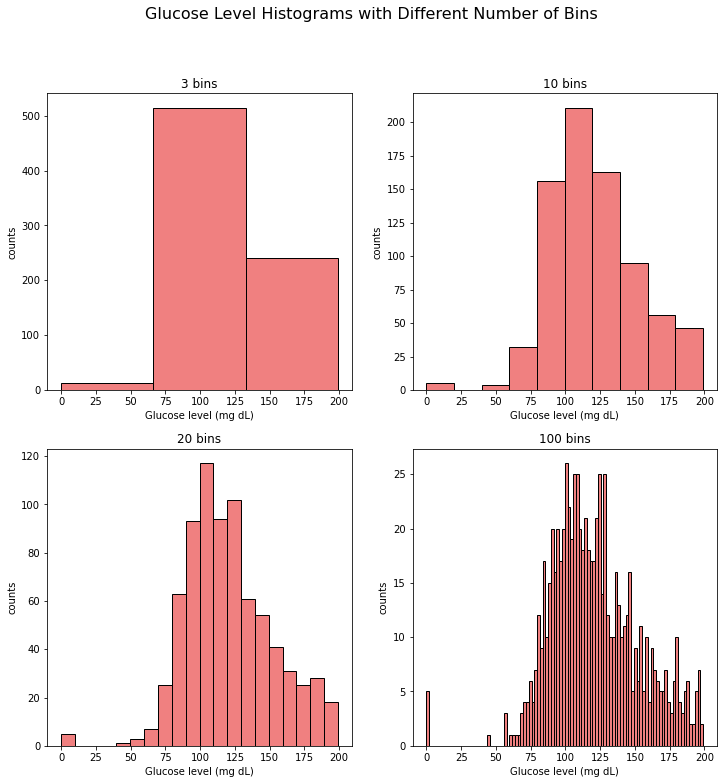

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Glucose Level Histograms with Different Number of Bins', fontsize=16)
axs[0][0].hist(glucose, bins=3, ec="black", color="lightcoral")
axs[0][0].set(ylabel="counts", xlabel= "Glucose level (mg dL)", title="3 bins")
axs[0][1].hist(glucose, bins=10, ec="black", color="lightcoral")
axs[0][1].set(ylabel="counts", xlabel= "Glucose level (mg dL)", title="10 bins")
axs[1][0].hist(glucose, bins=20, ec="black", color="lightcoral")
axs[1][0].set(ylabel="counts", xlabel= "Glucose level (mg dL)", title="20 bins")
axs[1][1].hist(glucose, bins=100, ec="black", color="lightcoral")
axs[1][1].set(ylabel="counts", xlabel= "Glucose level (mg dL)", title="100 bins")
plt.show()

## Effect of Outliers

In the left part of the histograms we can see some outliers. These are in fact examples with the value 0:

In [4]:
 glucose[glucose < 30]

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

Remember that the measure we discuss is glucose level, thus zero is not a possible value for that measure (even in life threatening hypoglycemia the sugar level is higher) and indicates some problem with these examples. Therefore we can dismiss these values when presenting the histogram to get a more accurate representation of the distribution:

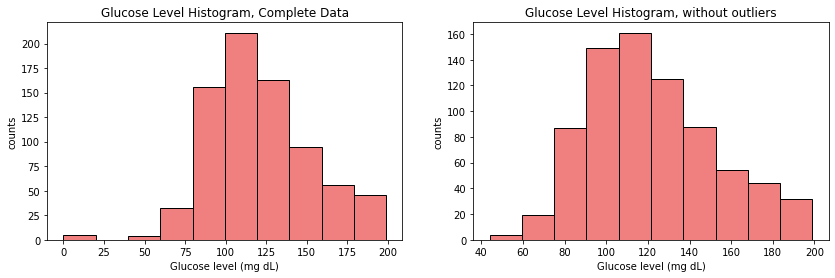

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 4))
axs[0].hist(glucose, ec="black", color="lightcoral")
axs[0].set(ylabel="counts", xlabel= "Glucose level (mg dL)", title="Glucose Level Histogram, Complete Data")
valid_glucose = glucose[glucose > 0]
axs[1].hist(valid_glucose, ec="black", color="lightcoral")
axs[1].set(ylabel="counts", xlabel= "Glucose level (mg dL)", title="Glucose Level Histogram, without outliers")
plt.show()

# Boxplots

In [6]:
glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

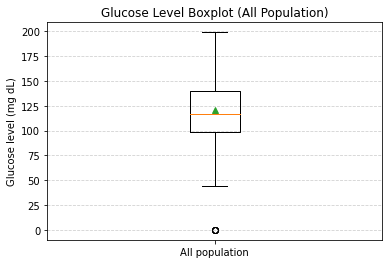

In [7]:
fix, ax = plt.subplots()
ax.yaxis.grid(True, alpha=0.6, linestyle='--')
ax.boxplot(glucose, showmeans=True)
ax.set(xticks=[1], xticklabels=["All population"], ylabel="Glucose level (mg dL)", title="Glucose Level Boxplot (All Population)")
plt.show()

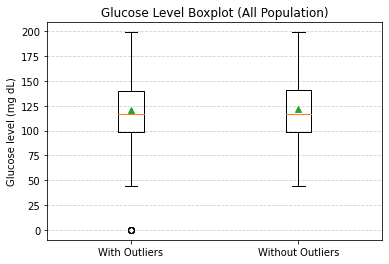

In [8]:
# Median is less sensitive than average to outliers
fix, ax = plt.subplots()
ax.yaxis.grid(True, alpha=0.6, linestyle='--')
ax.boxplot([glucose, glucose[glucose>0]], showmeans=True)
ax.set(xticks=[1, 2], xticklabels=["With Outliers", "Without Outliers"], ylabel="Glucose level (mg dL)", title="Glucose Level Boxplot (All Population)")
plt.show()

Boxplots are especially usefull for comparing summary of the same measure between different groups

In [9]:
# dividing age measure into three groups 
diabetes["age_group"]=pd.cut(diabetes.Age, [0, 45, 65, 90], labels=["20-45", "46-65", "66+"])

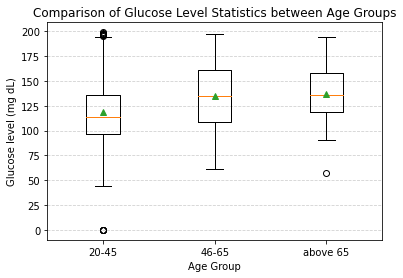

In [10]:
fix, ax = plt.subplots()
ax.yaxis.grid(True, alpha=0.6, linestyle='--')
ax.boxplot([glucose[diabetes.age_group=="20-45"], glucose[diabetes.age_group=="46-65"], glucose[diabetes.age_group=="66+"]],
           showmeans=True)
ax.set(xlabel="Age Group", xticks=[1,2,3], xticklabels=["20-45", "46-65", "above 65"], ylabel="Glucose level (mg dL)",
       title="Comparison of Glucose Level Statistics between Age Groups")
plt.show()

# Comparing Categorial Values

## Bar plots

In [11]:
# dividing glucose level into two groups 
diabetes["glucose_group"]=pd.cut(diabetes.Glucose, [0, 100, 200], labels=["low", "high"])

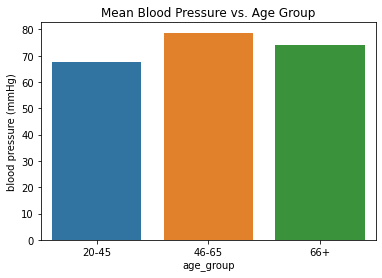

In [12]:
sns.barplot(x = 'age_group',
            y = 'BloodPressure',
            estimator = np.mean,
            data = diabetes, 
           ci = 0).set(title="Mean Blood Pressure vs. Age Group", ylabel="blood pressure (mmHg)")
plt.show()

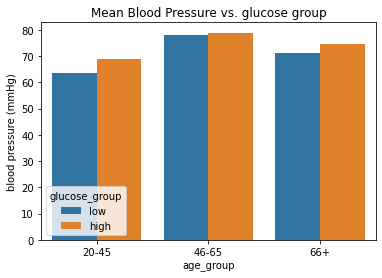

In [13]:
sns.barplot(x = 'age_group',
            y = 'BloodPressure',
            hue = "glucose_group",
            estimator = np.mean,
            data = diabetes, 
           ci = 0).set(title="Mean Blood Pressure vs. glucose group", ylabel="blood pressure (mmHg)")
plt.show()

## Tables

In [14]:
diabetes.groupby(["age_group", "glucose_group"], dropna=False)["Outcome"].count().unstack()

glucose_group,low,high
age_group,,
20-45,193,452
46-65,14,91
66+,2,11


In [15]:
diabetes.glucose_group.value_counts(dropna=False)

high    554
low     209
NaN       5
Name: glucose_group, dtype: int64

## Why bar charts are better than pie charts

A greengrocer wants to describe the share of sales of the three fruits he is selling.  

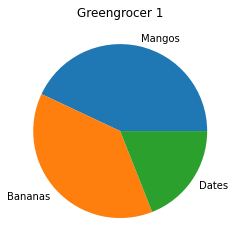

In [16]:
sales =  np.array([43, 38, 19])
fruits = ["Mangos", "Bananas", "Dates"]
plt.pie(sales, labels = fruits)
plt.title("Greengrocer 1")
plt.show() 

It is hard to deduce from this pie chart whether mango sales are greater than banana sales. Lets use bar plots instead:

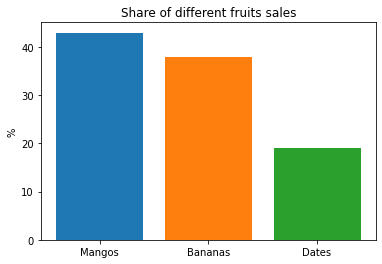

In [17]:
plt.bar(fruits, sales, color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.ylabel("%")
plt.title("Share of different fruits sales")
plt.show()

Here it is obvious that Mango sales are better. Now another greengrocer also wants to present her share of sales of the three fruits

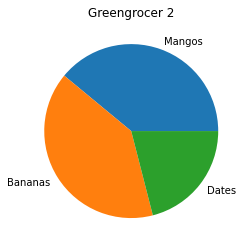

In [18]:
sales2 =  np.array([39, 40, 21])
plt.pie(sales2, labels = fruits)
plt.title("Greengrocer 2")
plt.show() 

This look quite similar to the previous pie chart, and it is hard to compare between them that way. Now lets plot all the data in one bar plot:

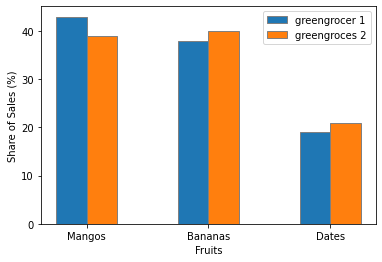

In [19]:
bar_width = 0.25
br1 = np.arange(len(sales))
br2 = [x + bar_width for x in br1]
fig, ax = plt.subplots()

ax.bar(br1, sales, width=bar_width, edgecolor ='grey', label = "greengrocer 1")
ax.bar(br2, sales2, width=bar_width, edgecolor ='grey', label= "greengroces 2")

ax.set(xlabel = 'Fruits', ylabel='Share of Sales (%)')
plt.xticks([r + bar_width/2 for r in range(len(sales))], fruits)
plt.legend()
plt.show()

# Showing Trends

## Scatter plots

In [20]:
# remove zero values from Glucose and BMI variables
diabetes_without_zeros = diabetes[(diabetes.Glucose>0) & (diabetes.BMI>0)]

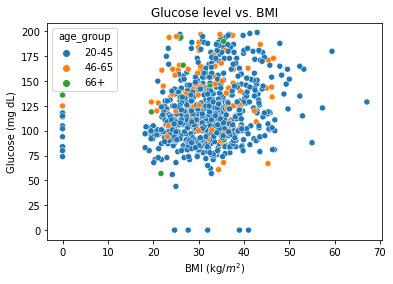

In [21]:
# without dropping the "0" values the plot is unclear
sns.scatterplot(data=diabetes, x="BMI",
                y="Glucose", hue="age_group").set(title="Glucose level vs. BMI",
                                                  xlabel="BMI (kg/$m^2$)", ylabel="Glucose (mg dL)")
plt.show()

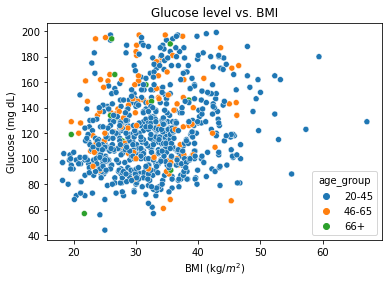

In [22]:
sns.scatterplot(data=diabetes_without_zeros, x="BMI",
                y="Glucose", hue="age_group").set(title="Glucose level vs. BMI",
                                                  xlabel="BMI (kg/$m^2$)", ylabel="Glucose (mg dL)")
plt.show()

## Regression Line

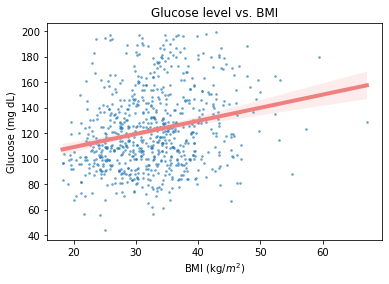

In [23]:
sns.regplot(data=diabetes_without_zeros, x="BMI",y="Glucose", 
            scatter_kws={'s': 3, 'alpha': 0.5}, 
            line_kws={'lw':4, 'color':"lightcoral"}).set(title="Glucose level vs. BMI",
                                                  xlabel="BMI (kg/$m^2$)", ylabel="Glucose (mg dL)")
plt.show()

# QQ-Plots

Looking at its histogram, the blood pressure distribution seems normal. 

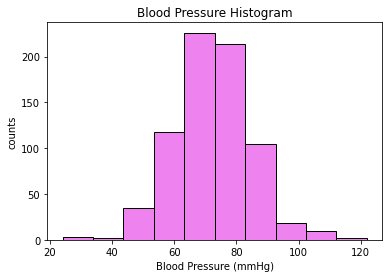

In [24]:
fig, ax = plt.subplots()
bp = diabetes["BloodPressure"][diabetes["BloodPressure"]>0]
ax.hist(bp, color="violet", ec="black")
ax.set(ylabel="counts", xlabel="Blood Pressure (mmHg)", title="Blood Pressure Histogram")
plt.show()

We want to farther investigate it using qq-plot. 

The following code is a really unefficient way to get qq-plot, but it serves as a good reminder of how qq-plots are created. Anyway, for your own qq-plot everyday needs (including your HWs), just use some off-the-shelf qq-plot library function, as demonstrated later.  

In [25]:
# Standardize the data
bp_standart = (bp-bp.mean())/bp.std()

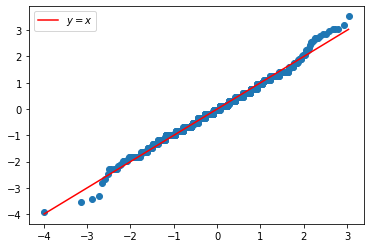

In [26]:
quantiles = np.arange(0, 1, 0.001)

# creating artificial standard normal distributed data
s = np.random.normal(0, 1, 10000)

# extract quantiles of normal distribution
norm_quantiles = np.quantile(s, quantiles)

# extract qunatiles of data
data_quantiles = bp_standart.quantile(quantiles).values

fig, ax = plt.subplots()
ax.scatter(norm_quantiles, data_quantiles)
ax.plot(norm_quantiles, norm_quantiles, color='r', label="$y=x$")
ax.legend()
plt.show()

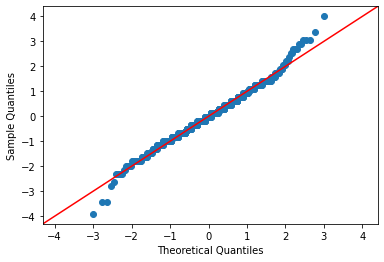

In [27]:
# and the easy way to do it... 
import statsmodels.api as sm
sm.qqplot(bp_standart, line='45')
plt.show()